In [162]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# Definir la función para evaluar un polinomio
def evalPoly(coeff, x):
    grado = len(coeff) - 1
    suma_Ak_Xk = 0
    suma_Xk2 = 0
    for k, c in enumerate(coeff):
        suma_Ak_Xk = suma_Ak_Xk + c*x**(grado - k)
        suma_Xk2 = suma_Xk2 + (x**(grado - k))**2
        
    return suma_Ak_Xk, suma_Xk2
        
# Prueba
c = np.array([2, -3, 5, -7])
y_eval = evalPoly(c, 1)
print(y_eval)

(-3, 4)


In [241]:
# Definir el método de la Neurona Guía

def NeuronaGuia(x_nodos, y_nodos, gradoPoly, console=False, graficaAprox=True, graficaError=False):
       
    # Obtener la cantidad de nodos del experimento
    cNodos = len(x_nodos)

    # Crear un ciclo para recorrer cada nodo
    for k in range(cNodos):
        
        # Obtener el valor de x e y del nodo k
        x = x_nodos[k]
        y = y_nodos[k]
        
        if console:
            print("")
            print("------------------------------------------------")
            print("Entrenamiento Nodo ", k)
        
        # en el caso de que sea la primera iteracción genero los coeficientes aleatorios
        if k==0:
            Coeff = np.random.rand(gradoPoly + 1)
            
        if console:
            print("C_"+str(k)+": ",Coeff) 
        
        # Define el vector de convergencia del error
        vError = []       
        
        # Recorrer cada nodo por cada neurona
        for j in range(cNodos):
            
            # Obtener los coeficientes de la neurona anterior
            if j==0 and k==0:
                C = Coeff         
                        
            # Evaluar el polinomio en el nodo k   
            y_, x2 = evalPoly(C, x)
            
            # Calcular el error
            error = y - y_
            vError.append(error)
            
            if console:
                print("Error Nodo_"+str(j),": ",np.abs(error),"y: ",y,"; y_: ",y_)
            
            # Determinar un valor de alfa funcional
            alfa = error / (2*x2)
            
            if console:
                print("alfa: ", alfa)      
            
            # Actualizar los coeficientes
            C = C + alfa*np.array([x**(gradoPoly-k) for k in range(gradoPoly + 1)])
            
            if console:
                print("C_"+str(j)+": ", C)
                
            if error < 1e-3:
                break
            
        # Actualizar el valor de los coeficientes por iteración
        Coeff = C
        
        if graficaError:
            cError = len(vError)
            itera = np.array([k for k in range(cError)])
            plt.plot(itera, vError)
        
    if graficaError:
        plt.title('Gráfica del Error por Iteración')
        plt.xlabel('Número de Iteraciones')
        plt.ylabel('Valor del Error Absoluto')
        plt.grid(linestyle='--')
        plt.show()

    # Evaluar el polinomio
    y_f, x2 = evalPoly(Coeff, x_nodos)
    
    # Calcular el error promdio
    y_diff = np.abs(y_f - y_nodos)
    eMean = np.mean(y_diff)
    eStd = np.std(y_diff)
    
    eError = 0
    for i in range(len(y_f)):
        eError = eError + np.abs((y_f[i] - y_nodos[i]))  
    eError = eError / len(y_f) 
    
    if console:
        print(y_f)

    if graficaAprox:
        plt.plot(x_nodos, y_f)
        plt.scatter(x_nodos, y_nodos, c='red', zorder=3)
        plt.grid(linestyle='--')
        plt.legend(['Aproximación', 'Nodos'])
        plt.title('Aproximación Polinomial')
        plt.xlabel('Valores de $x$')
        plt.ylabel('Valores de $y$')
        plt.show()
        
    # Devolver los resultados
    return Coeff, eMean, eStd, eError

[ 0.00000000e+00  3.24699469e-01  6.14212713e-01  8.37166478e-01
  9.69400266e-01  9.96584493e-01  9.15773327e-01  7.35723911e-01
  4.75947393e-01  1.64594590e-01 -1.64594590e-01 -4.75947393e-01
 -7.35723911e-01 -9.15773327e-01 -9.96584493e-01 -9.69400266e-01
 -8.37166478e-01 -6.14212713e-01 -3.24699469e-01 -2.44929360e-16]


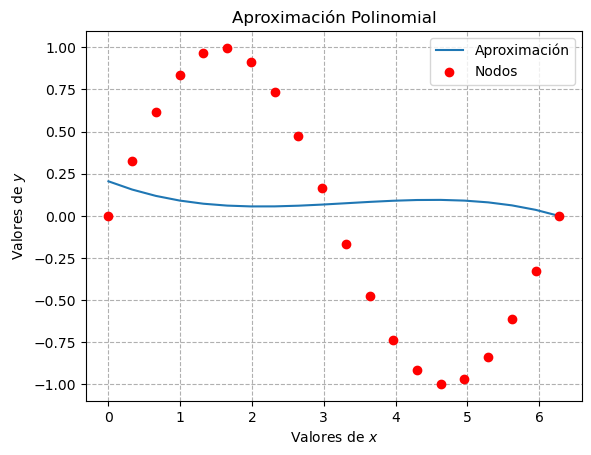

Coeficientes:  [-0.00576346  0.05749192 -0.1664442   0.205322  ]
Error Promedio:  0.6120499413647428
Error Promedio 2 :  0.6120499413647429
Desviación Estándar del Error:  0.336166095183636


In [242]:
# Crear una definición de función seno para aproximar una función cúbica
def funcion(x):
    return np.sin(x)

C_poly = np.array([2, -3, 5, -7, 9, -11, 13])

x_nodos = np.linspace(0, 2*np.pi, 20)
# y_nodos, x2 = evalPoly(C_poly, x_nodos)
y_nodos = funcion(x_nodos)
print(y_nodos)

Coeff, eMean, eStd, eError = NeuronaGuia(x_nodos, y_nodos, 3, graficaError=False, console=False)
print("Coeficientes: ", Coeff)
print("Error Promedio: ", eMean)
print("Error Promedio 2 : ", eError)
print("Desviación Estándar del Error: ", eStd)